# CS156 Session 9.2 Pre-class Work
**`Feedforward neural networks`**

## 1. Gradients

Calculate the gradients for the following activations:

- Linear
- Rectified Linear Unit (aka ReLU)
- Sigmoid

Also, refresh your knowledge of the chain rule so that you are able to differentiate functions of the form: f(g(h(x)), where f,g, and h are drawn from the functions given above.

**Linear**: $y = wx + c \Rightarrow \dfrac{\partial y}{\partial x} = w$

**ReLU**: $y = max\{0, x\} \Rightarrow \dfrac{\partial y}{\partial x} = 
\begin{cases}0;{\text{if }}x<0\\1;{\text{if }}x>0\\{\text{undefined}};{\text{if }}x=0\end{cases}$

**Sigmoid**: $y = \dfrac{1}{1 + e^{-x}} \Rightarrow \dfrac{\partial y}{\partial x} = \dfrac{e^{-x}}{(1 + e^{-x})^2}$

## 2. Keras

Experiment with different neural network architectures and build classifiers for the two datasets given below. For each dataset, the x is a 2 dimensional input and the y is the binary label “0” or “1”.

`
from sklearn import datasets
(moon_x,moon_y) = datasets.make_moons(n_samples=10000, noise=0.05, random_state=42)
(circle_x,circle_y) = datasets.make_circles(n_samples=10000, noise=0.025, random_state=42)`

1. For each dataset, plot the data in 2 dimensions, and also show the decision boundaries of your network (for example, produce a visualization like [this](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html).

2. Make note of your final accuracy on the training dataset, and the cross entropy score as well.


### a. Load packages

In [27]:
#Load packages and datasets
from keras.models import Sequential
from keras.layers import Dense
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

### b. Define function to plot data and decision boundary

In [30]:
"""
Slightly adapted from https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html

"""

def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out


### c. Load datasets

In [15]:
(moon_x,moon_y) = datasets.make_moons(n_samples=10000, noise=0.05, random_state=42)

(circle_x,circle_y) = datasets.make_circles(n_samples=10000, noise=0.025, random_state=42)

### d. Modeling Moon Dataset with Neural Network

**Define and compile keras model:**

In [23]:
#Define keras model
model = Sequential()
model.add(Dense(8, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Compile keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**Fit keras model:**

In [24]:
model.fit(moon_x,moon_y, epochs=15, batch_size=10)

Epoch 1/15
1000/1000 [==============================] - 1s 697us/step - loss: 0.3810 - accuracy: 0.8215
Epoch 2/15
1000/1000 [==============================] - 1s 601us/step - loss: 0.2359 - accuracy: 0.8911
Epoch 3/15
1000/1000 [==============================] - 1s 584us/step - loss: 0.2061 - accuracy: 0.8999
Epoch 4/15
1000/1000 [==============================] - 1s 584us/step - loss: 0.1841 - accuracy: 0.9106
Epoch 5/15
1000/1000 [==============================] - 1s 569us/step - loss: 0.1589 - accuracy: 0.9257
Epoch 6/15
1000/1000 [==============================] - 1s 619us/step - loss: 0.1250 - accuracy: 0.9484
Epoch 7/15
1000/1000 [==============================] - 1s 581us/step - loss: 0.0882 - accuracy: 0.9733
Epoch 8/15
1000/1000 [==============================] - 1s 570us/step - loss: 0.0617 - accuracy: 0.9876
Epoch 9/15
1000/1000 [==============================] - 1s 571us/step - loss: 0.0428 - accuracy: 0.9959
Epoch 10/15
1000/1000 [==============================] - 1s 580u

- loss (cross entropy score): 0.0048 
- accuracy: 1.0000

**Plot Moon data and keras model's decision boundary**

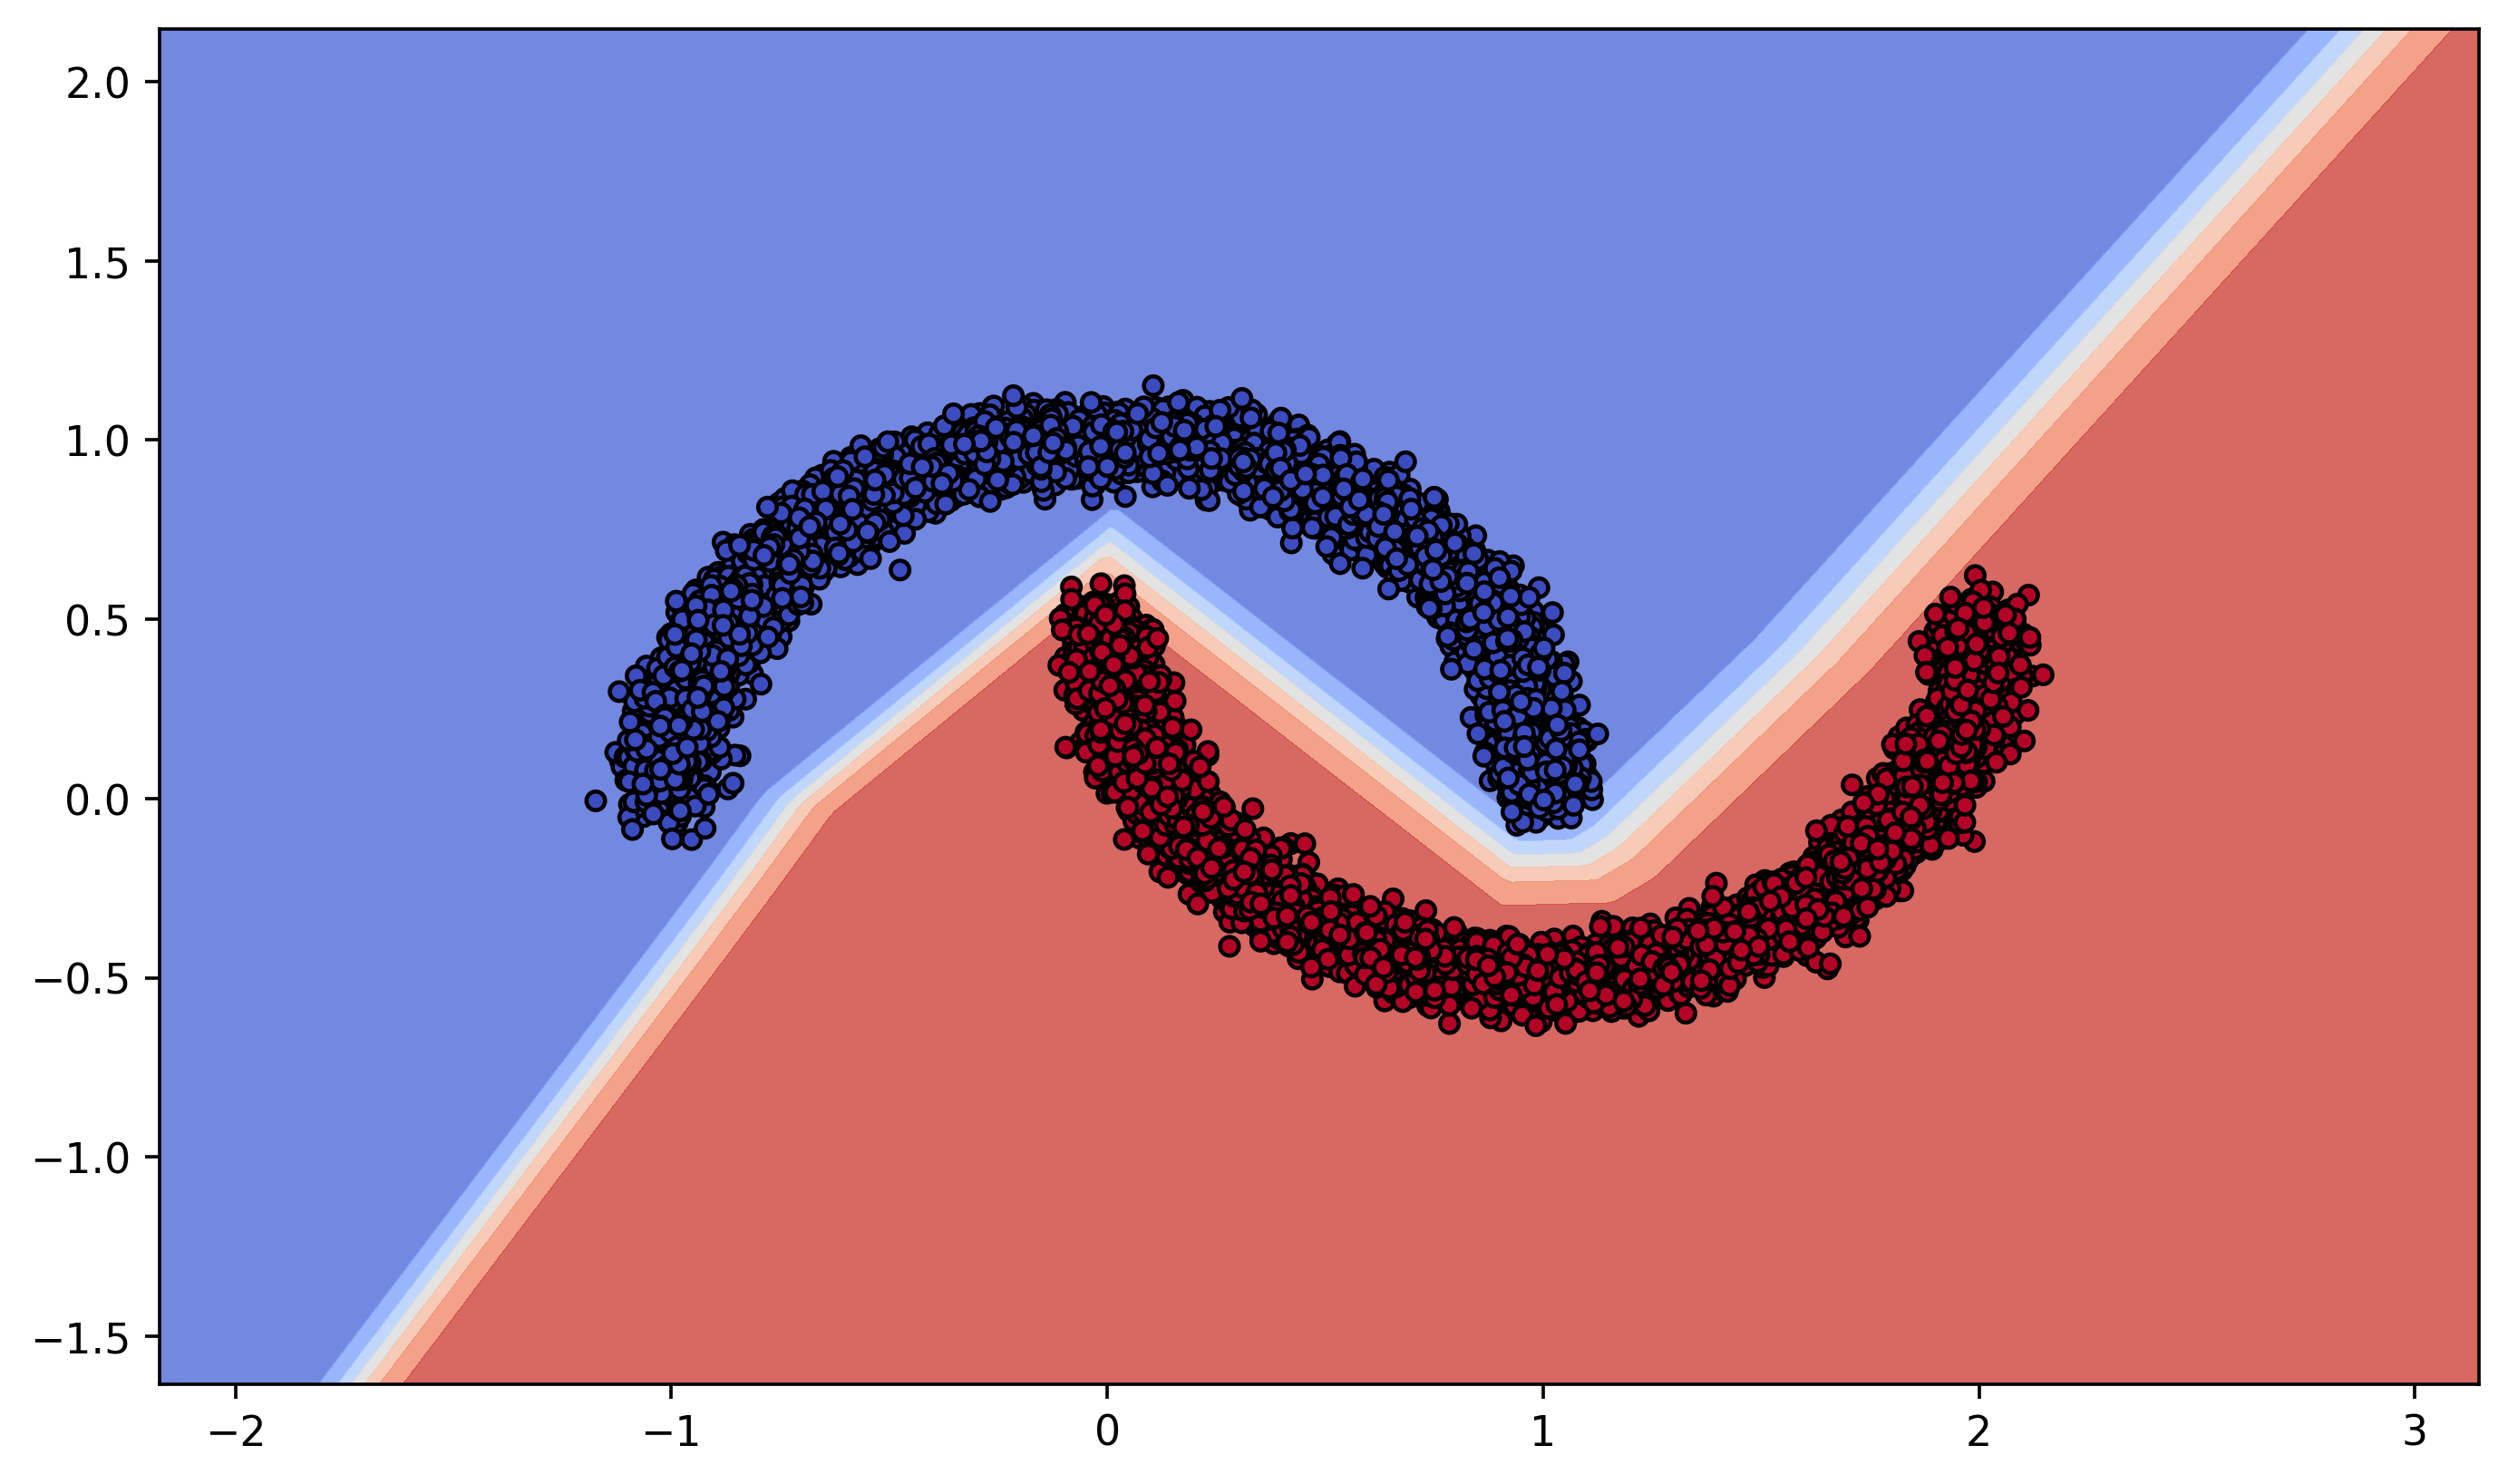

In [33]:
plt.figure(figsize=(10, 6), dpi=330)

ax = plt.gca()

X0, X1 = moon_x[:, 0], moon_x[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, model, xx, yy,
              cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=moon_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

### e. Modeling circles dataset

**Define and compile keras model:**

In [34]:
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**Fit keras model**

In [35]:
model.fit(circle_x, circle_y, epochs=15, batch_size=10)

Epoch 1/15
1000/1000 [==============================] - 1s 610us/step - loss: 0.6873 - accuracy: 0.5157
Epoch 2/15
1000/1000 [==============================] - 1s 626us/step - loss: 0.6735 - accuracy: 0.5554
Epoch 3/15
1000/1000 [==============================] - 1s 580us/step - loss: 0.6548 - accuracy: 0.6267
Epoch 4/15
1000/1000 [==============================] - 1s 595us/step - loss: 0.6244 - accuracy: 0.7603
Epoch 5/15
1000/1000 [==============================] - 1s 633us/step - loss: 0.5870 - accuracy: 0.8737
Epoch 6/15
1000/1000 [==============================] - 1s 650us/step - loss: 0.5449 - accuracy: 0.9394
Epoch 7/15
1000/1000 [==============================] - 1s 653us/step - loss: 0.5003 - accuracy: 0.9760
Epoch 8/15
1000/1000 [==============================] - 1s 739us/step - loss: 0.4545 - accuracy: 0.9909
Epoch 9/15
1000/1000 [==============================] - 1s 689us/step - loss: 0.4095 - accuracy: 0.9959
Epoch 10/15
1000/1000 [==============================] - 1s 693u

- loss: 0.1908 
- accuracy: 1.0000

**Plot circles data and keras model's decision boundary**

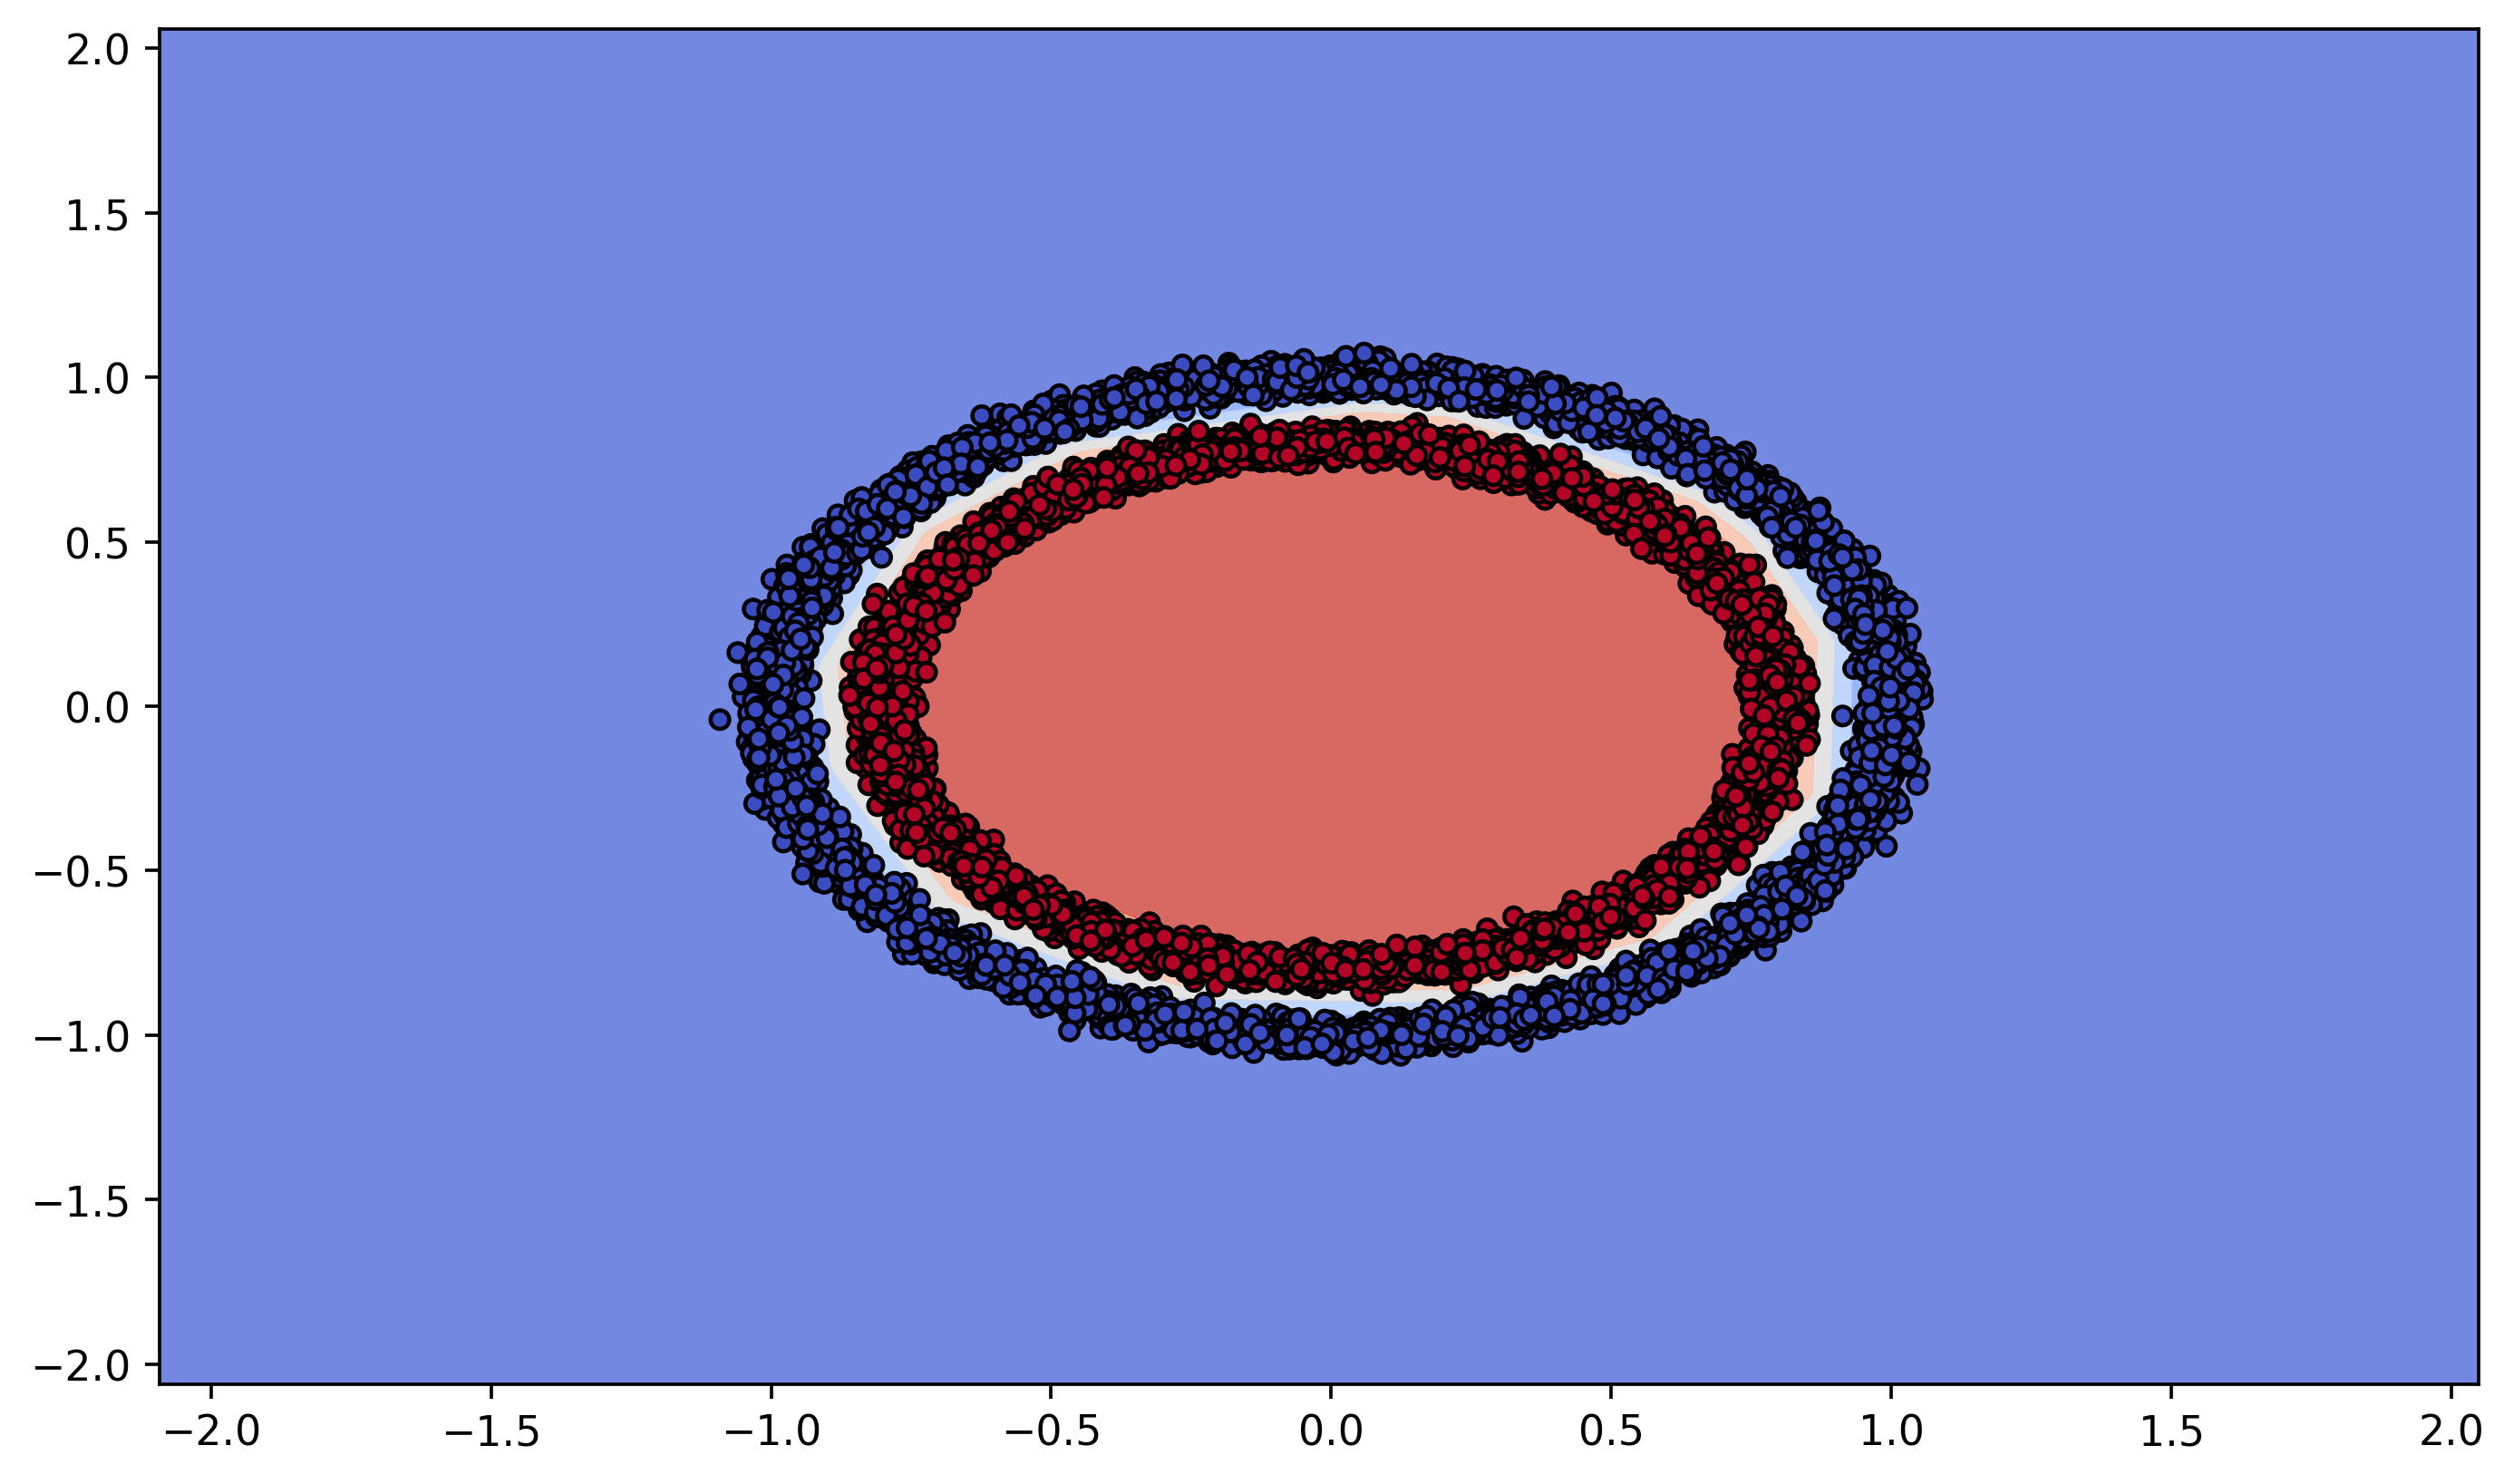

In [38]:
plt.figure(figsize=(10, 6), dpi=330)

ax = plt.gca()

X0, X1 = circle_x[:, 0], circle_x[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, model, xx, yy,
              cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=moon_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()